In [231]:
%matplotlib inline

# Transition Matrix Creation Part 1

Want to create an (expectedly pretty sparse) transition matrix for each subway line.

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
df_checkins = pd.read_csv('../_data/df_subway_station_checkins.csv')

In [234]:
df_checkins.drop('Unnamed: 0', axis=1, inplace=True)

In [235]:
df_stations = pd.read_csv('../_data/df_subway_stations.csv')

In [237]:
df_stations.drop('Unnamed: 0', axis=1, inplace=True)

In [238]:
df_checkins['localTimestamp'] = pd.to_datetime(df_checkins['localTimestamp'])

In [239]:
df_checkins.head()

,venueId,latitude,longitude,localTimestamp
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52
1,4b8c5418f964a520e3ca32e3,35.682,139.80,2012-04-04 03:04:04
2,4b5bac4af964a520200f29e3,35.550,139.63,2012-04-04 03:39:12
3,4b7481e1f964a520bde02de3,35.730,139.71,2012-04-04 03:52:17
4,4b2692f9f964a520be7d24e3,35.689,139.71,2012-04-04 03:56:43


In [240]:
df_stations.head()

,id,latitude,line_id,line_name,longitude,name,next_0_name,next_0_id,next_1_name,next_1_id,line_color
0,2800101,35.710733,28001,Tokyo Metro Ginza Line,139.797592,Asakusa,NaN,0,Tahara-cho,2800102,#f7931d
1,2800102,35.709897,28001,Tokyo Metro Ginza Line,139.790897,Tahara-cho,Asakusa,2800101,Inaricho,2800103,#f7931d
2,2800103,35.711273,28001,Tokyo Metro Ginza Line,139.782593,Inaricho,Tahara-cho,2800102,Ueno,2800104,#f7931d
3,2800104,35.711482,28001,Tokyo Metro Ginza Line,139.777122,Ueno,Inaricho,2800103,Ueno Hirokoji,2800105,#f7931d
4,2800105,35.707680,28001,Tokyo Metro Ginza Line,139.772877,Ueno Hirokoji,Ueno,2800104,Suehiro cho,2800106,#f7931d


In [241]:
df_stations_rounded = df_stations.copy()
df_stations_rounded['latitude'] = df_stations_rounded['latitude'].apply(lambda x: np.round_(x, decimals=3))
df_stations_rounded['longitude'] = df_stations_rounded['longitude'].apply(lambda x: np.round_(x, decimals=2))

In [188]:
pd.merge_asof(df_checkins, df_stations_rounded, left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])


MergeError: can only asof on a key for left

In [242]:
df_merge_inner = pd.merge(df_checkins, df_stations_rounded, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

In [189]:
df_merge_left = pd.merge(df_checkins, df_stations_rounded, how='left', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

In [243]:
df_merge_inner = df_merge_inner.sort_values('localTimestamp')

In [244]:
df_merge_inner.to_csv('../_data/df_subway_merged.csv', index=False)

In [221]:
df_merge_inner[df_merge_inner['line_name'] == 'Toei Mita Line']

,venueId,latitude,longitude,localTimestamp,id,line_id,line_name,name,next_0_name,next_1_name
0,4b5da9e0f964a520bb6529e3,35.749,139.72,2012-04-04 02:59:52,9930317,99303,Toei Mita Line,Shinbashi,Nishikamo,Itabashi Ward Office
1560,4b9b8cd2f964a520c30e36e3,35.676,139.76,2012-04-04 04:12:01,9930308,99303,Toei Mita Line,Hibiya,Uchisaiwasemachi,Otemachi
5479,4dc5e8f5e4cd169dc659fe4d,35.792,139.65,2012-04-04 04:23:00,9930327,99303,Toei Mita Line,Nishi Takashimairaira,Shin Takeshimairing,NaN
5480,4dc5e8f5e4cd169dc659fe4d,35.792,139.65,2012-04-04 04:51:43,9930327,99303,Toei Mita Line,Nishi Takashimairaira,Shin Takeshimairing,NaN
18077,4b2c4c0bf964a52075c524e3,35.654,139.75,2012-04-04 05:18:12,9930305,99303,Toei Mita Line,Shibakoen,Mita,The gate
20682,4b413218f964a52005c325e3,35.721,139.75,2012-04-04 05:32:39,9930313,99303,Toei Mita Line,Hakusan,Kasuga,Sengoku
21843,4b7b65f0f964a520e2612fe3,35.661,139.75,2012-04-04 05:39:32,9930306,99303,Toei Mita Line,The gate,Shibakoen,Uchisaiwasemachi
26579,4b2df016f964a5201adc24e3,35.670,139.76,2012-04-04 05:51:56,9930307,99303,Toei Mita Line,Uchisaiwasemachi,The gate,Hibiya
28097,4b823278f964a520f0cc30e3,35.695,139.76,2012-04-04 06:12:06,9930310,99303,Toei Mita Line,Jimbocho,Otemachi,Aqueduct
18078,4b2c4c0bf964a52075c524e3,35.654,139.75,2012-04-04 08:29:30,9930305,99303,Toei Mita Line,Shibakoen,Mita,The gate


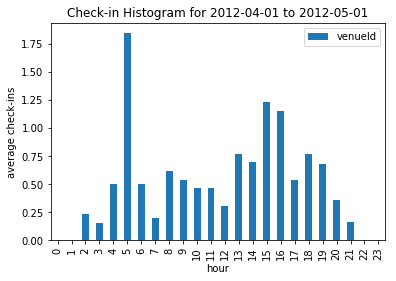

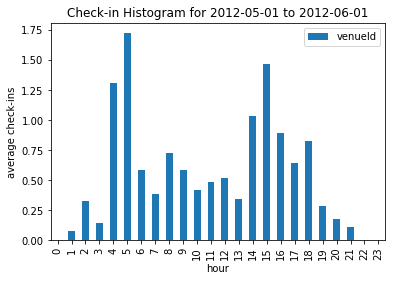

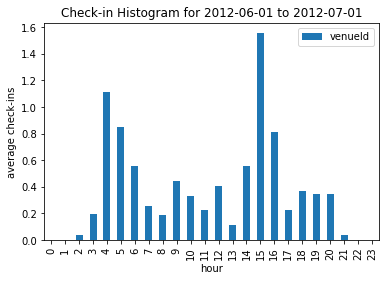

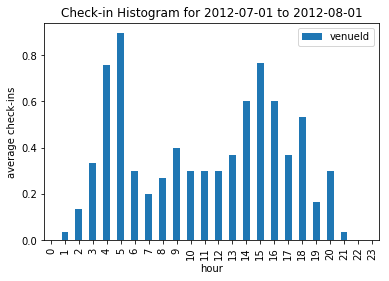

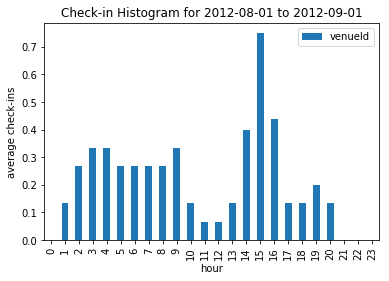

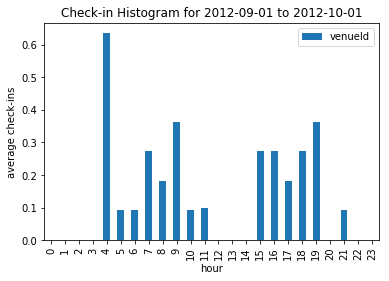

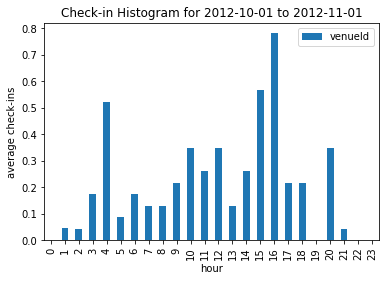

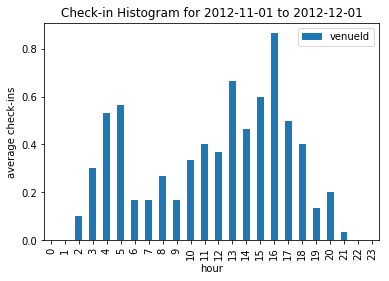

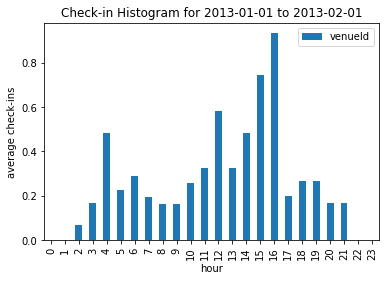

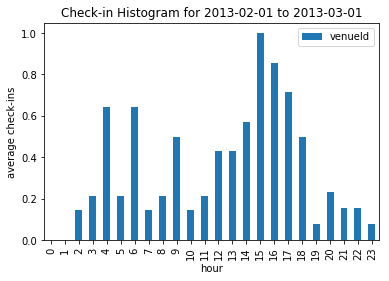

In [205]:
hours_toei_mita = []
for date in dates:
    hours_toei_mita.append(plot_usage_of_checkins_custom(date[0], date[1], plot=True, df=df_merge_inner[df_merge_inner['line_name'] == 'Toei Mita Line']))

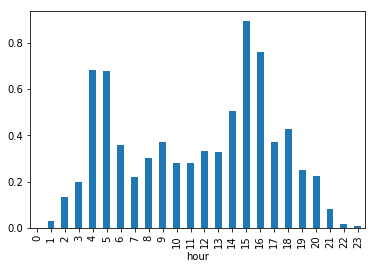

In [206]:
pd.concat(hours_toei_mita, axis=1).mean(axis=1).plot(kind='bar')

### Time Analysis

Create histograms to see if there are clearly different distributions of checkins based on the hour of the day

In [203]:
def plot_usage_of_checkins_custom(start_date, end_date, plot=False, df=df_checkins):
    """start_date: 'YYYY-MM-DD'"""
    df = df[(df['localTimestamp'] > start_date) & 
                     (df['localTimestamp'] < end_date)]
    # Count check-ins by hour, then group by hour and take mean of this across days
    df = df[['localTimestamp', 'venueId']].groupby(pd.Grouper(key='localTimestamp', freq='1H')).count()
    df['hour'] = df.index.map(lambda x: x.hour)
    df_hr_mean = df.groupby('hour').mean()
    if plot:
        df_hr_mean.plot(kind='bar', title="Check-in Histogram for {} to {}".format(start_date, end_date)).set_ylabel("average check-ins")
    return df_hr_mean

In [146]:
def plot_usage_of_checkins(start_date, end_date, plot=False):
    """start_date: 'YYYY-MM-DD'"""
    df = df_checkins[(df_checkins['localTimestamp'] > start_date) & 
                     (df_checkins['localTimestamp'] < end_date)]
    # Count check-ins by hour, then group by hour and take mean of this across days
    df = df[['localTimestamp', 'venueId']].groupby(pd.Grouper(key='localTimestamp', freq='1H')).count()
    df['hour'] = df.index.map(lambda x: x.hour)
    df_hr_mean = df.groupby('hour').mean()
    if plot:
        df_hr_mean.plot(kind='bar', title="Check-in Histogram for {} to {}".format(start_date, end_date)).set_ylabel("average check-ins")
    return df_hr_mean
    

In [135]:
for i in range(1, 13):
    def convert(i):
        if i < 10:
            return "0{}".format(i)
        else:
            return str(i)
    str_i = convert(i)
    str_i1 = convert(i+1)
    print("('2013-{}-01', '2013-{}-01'),".format(str_i, str_i1))

('2013-01-01', '2013-02-01'),
('2013-02-01', '2013-03-01'),
('2013-03-01', '2013-04-01'),
('2013-04-01', '2013-05-01'),
('2013-05-01', '2013-06-01'),
('2013-06-01', '2013-07-01'),
('2013-07-01', '2013-08-01'),
('2013-08-01', '2013-09-01'),
('2013-09-01', '2013-10-01'),
('2013-10-01', '2013-11-01'),
('2013-11-01', '2013-12-01'),
('2013-12-01', '2013-13-01'),


In [141]:
dates = [('2012-04-01', '2012-05-01'), ('2012-05-01', '2012-06-01'), ('2012-06-01', '2012-07-01'),
         ('2012-07-01', '2012-08-01'), ('2012-08-01', '2012-09-01'), ('2012-09-01', '2012-10-01'),
         ('2012-10-01', '2012-11-01'), ('2012-11-01', '2012-12-01'), ('2013-01-01', '2013-02-01'),
         ('2013-02-01', '2013-03-01')]

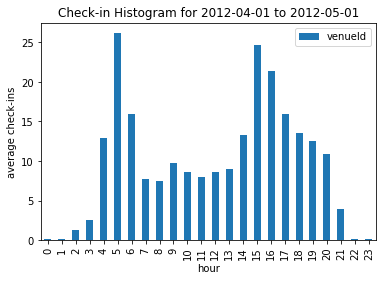

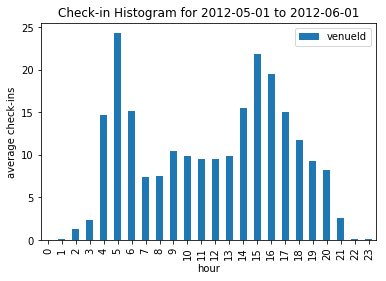

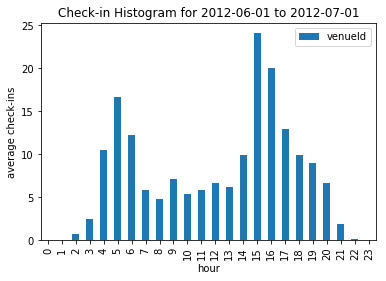

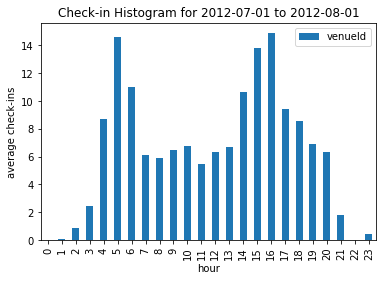

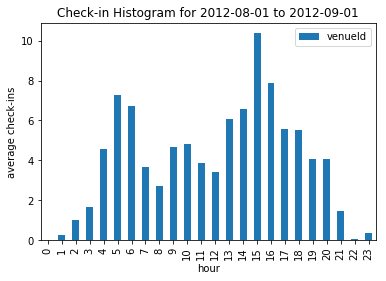

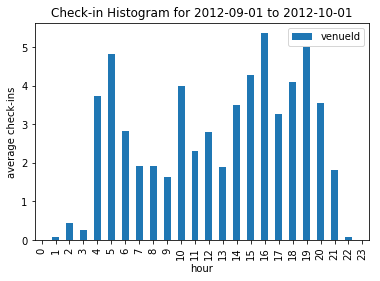

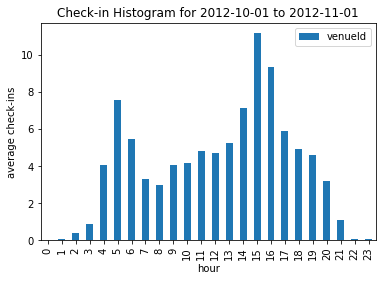

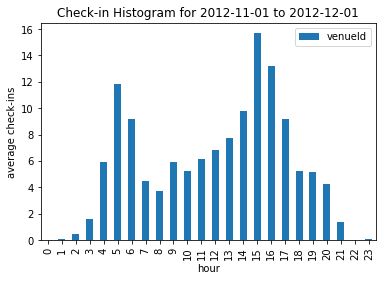

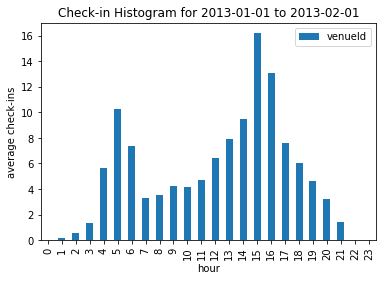

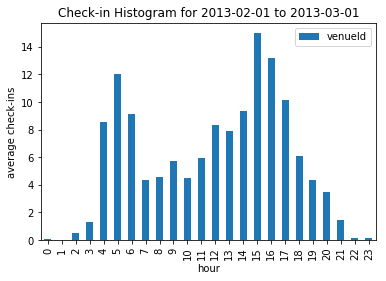

In [148]:
hours = []
for date in dates:
    hours.append(plot_usage_of_checkins(date[0], date[1], plot=True))

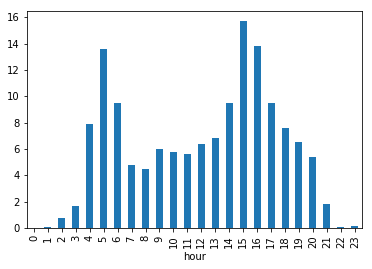

In [160]:
pd.concat(hours, axis=1).mean(axis=1).plot(kind='bar')